# Aggregate by weights and by counts


We assign weights to the examples whose values are inversely proportional to the number of measures
reported by the corresponding cruise ID. If the cruise reports more measures, the measures are assigned
smaller weights, and vice versa.

In the following plots, **the first column** is the cummulative curve aggreagated **over the weights**,
and **the second column** is the one that aggregated **over the counts** (i.e. ignore the weights)

In [82]:
ls ../runs

first-run/           second-run/          third-run-no-geoloc/


In [90]:
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt


def get_margin_plot(scores0, weights0, scores1, weights1, labels, ax, legends=None, title=None, colors=['b', 'r']):
    y0 = np.cumsum(weights0) / np.sum(weights0)
    ax[0].plot(scores0, 1.0 - y0, colors[0], label=labels[0])
    ax[0].fill_between(scores0, 1.0 - y0, alpha=0.2, color=colors[0])
    y1 = np.cumsum(weights1) / np.sum(weights1)
    ax[0].plot(scores1, y1, colors[1], label=labels[1])
    ax[0].fill_between(scores1, y1, alpha=0.2, color=colors[1])
    ax[0].legend(loc=9)
    ax[0].set_xlabel('Margin Score')
    ax[0].set_ylabel('Weights %')
    if title:
        ax[0].set_title(title)

    y0 = np.cumsum(np.ones_like(weights0)) / weights0.shape[0]
    ax[1].plot(scores0, 1.0 - y0, colors[0], label=labels[0])
    ax[1].fill_between(scores0, 1.0 - y0, alpha=0.2, color=colors[0])
    y1 = np.cumsum(np.ones_like(weights1)) / weights1.shape[0]
    ax[1].plot(scores1, y1, colors[1], label=labels[1])
    ax[1].fill_between(scores1, y1, alpha=0.2, color=colors[1])
    ax[1].legend(loc=9)
    ax[1].set_xlabel('Margin Score')
    ax[1].set_ylabel('# Measures %')
    if title:
        ax[1].set_title(title)


def plot_scores(data, source):    
    _, labels, scores, weights = data
    scores0 = scores[labels == 0]
    weights0 = weights[labels == 0]
    order0 = np.argsort(scores0)
    scores0, weights0 = scores0[order0], weights0[order0]

    scores1 = scores[labels == 1]
    weights1 = weights[labels == 1]    
    order1 = np.argsort(scores1)
    scores1, weights1 = scores1[order1], weights1[order1]

    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    # for i in range(10):
    get_margin_plot(scores0, weights0, scores1, weights1,
                    ["good", "bad"], ax, colors=_style)

    for i in range(len(ax)):
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='gray')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

    ax[0].set_title('%s aggr. by weights\ndata_size=%d' % (source, labels.shape[0]))
    ax[1].set_title('%s aggr. by counts\ndata_size=%d' % (source, labels.shape[0]))

    # fig.savefig("filename.pdf", format="pdf")

Scores range	min 	max 
AGSO        	0.02	0.57
NGDC        	0.00	1.00
US_multi    	0.00	1.00
JAMSTEC     	0.00	1.00
NOAA_geodas 	0.09	0.31
NGA         	0.00	1.00
SIO         	0.03	0.92


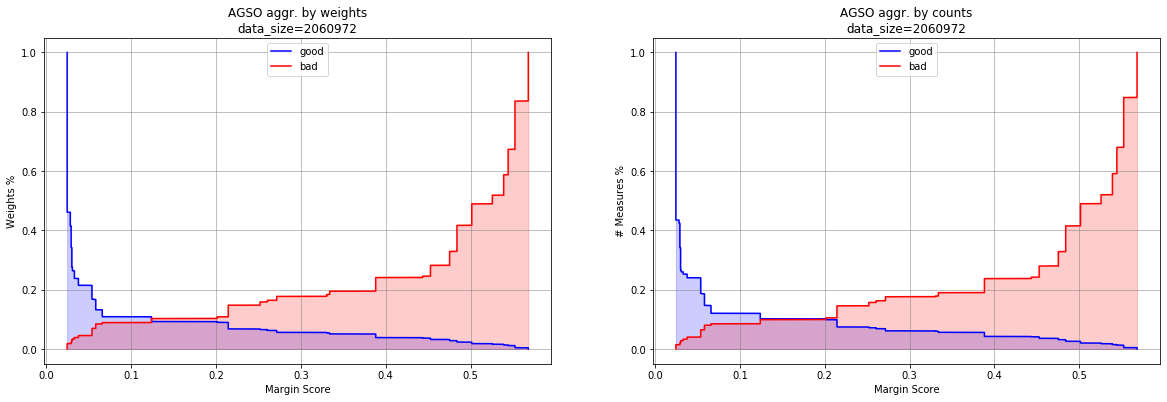

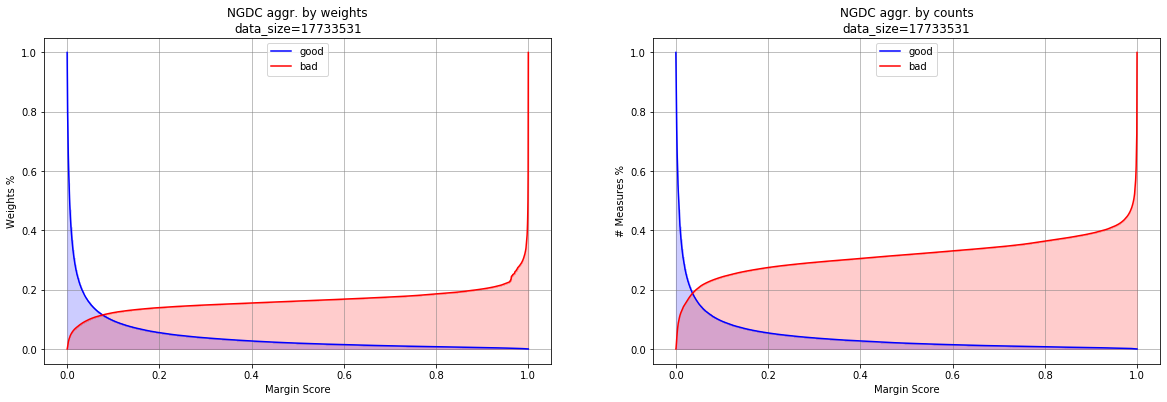

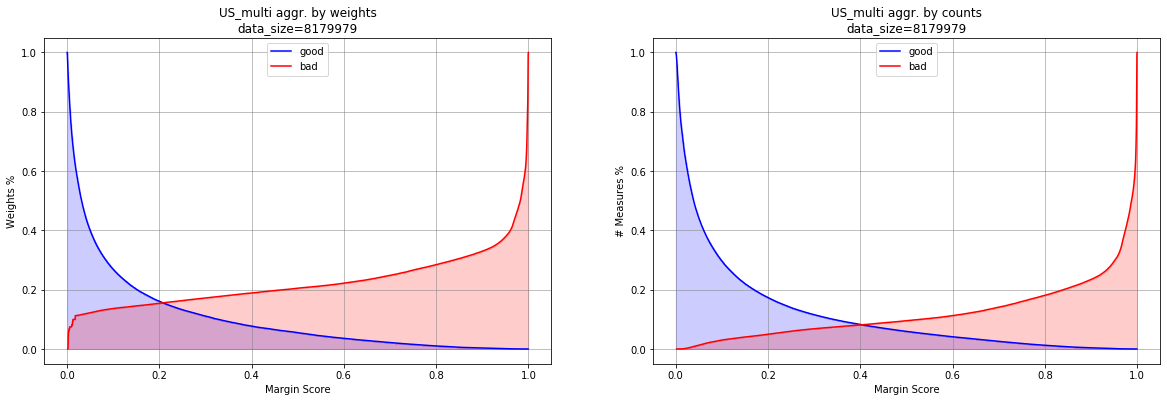

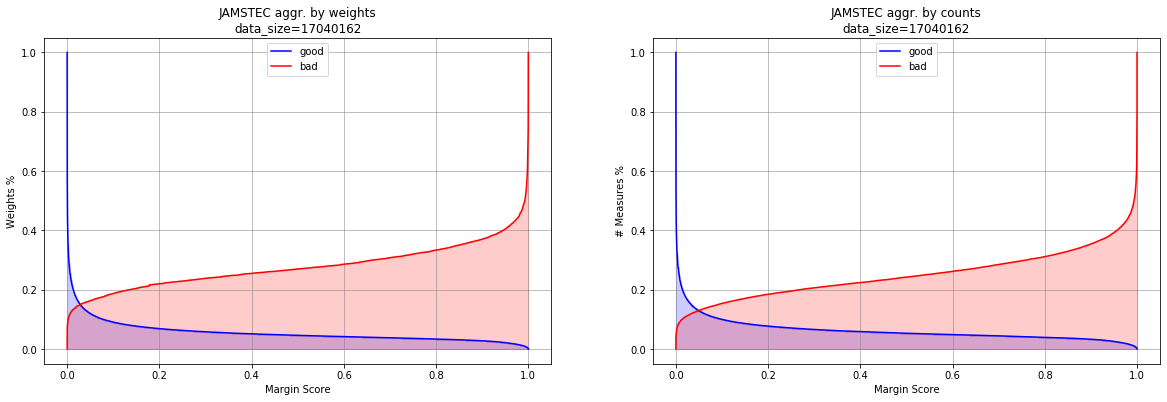

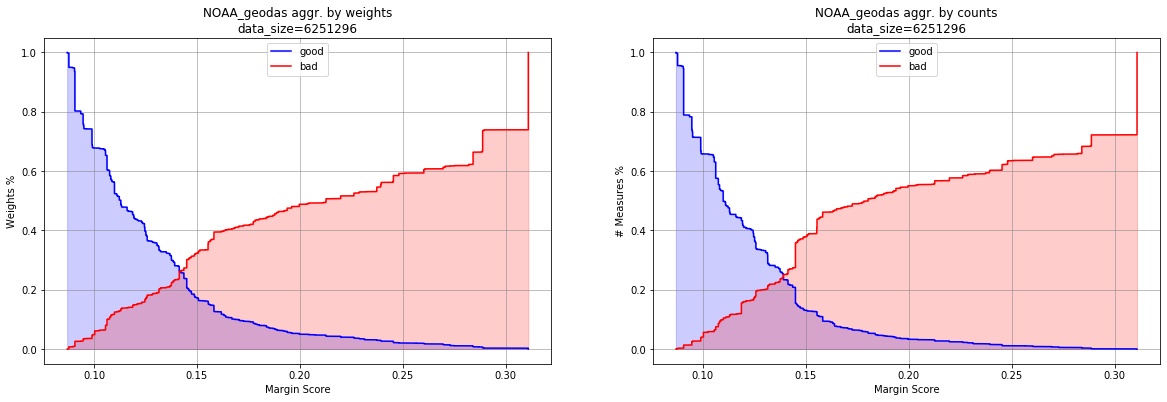

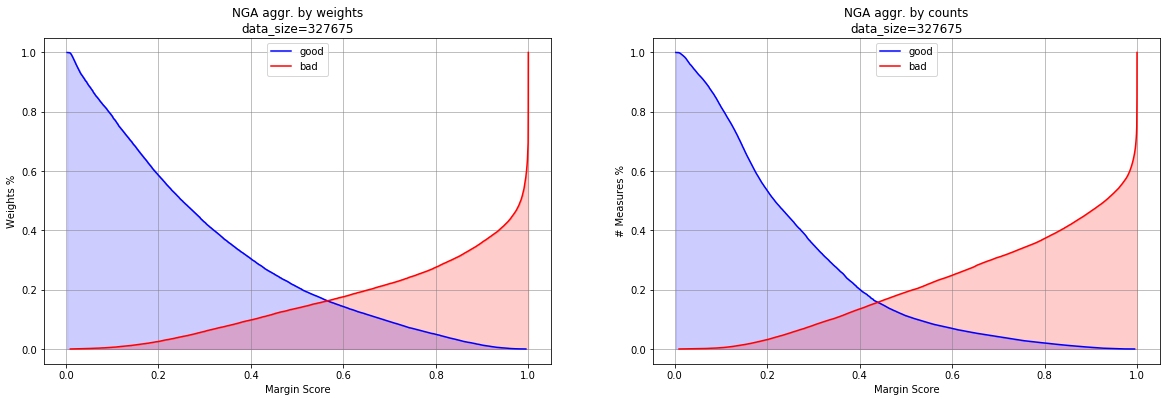

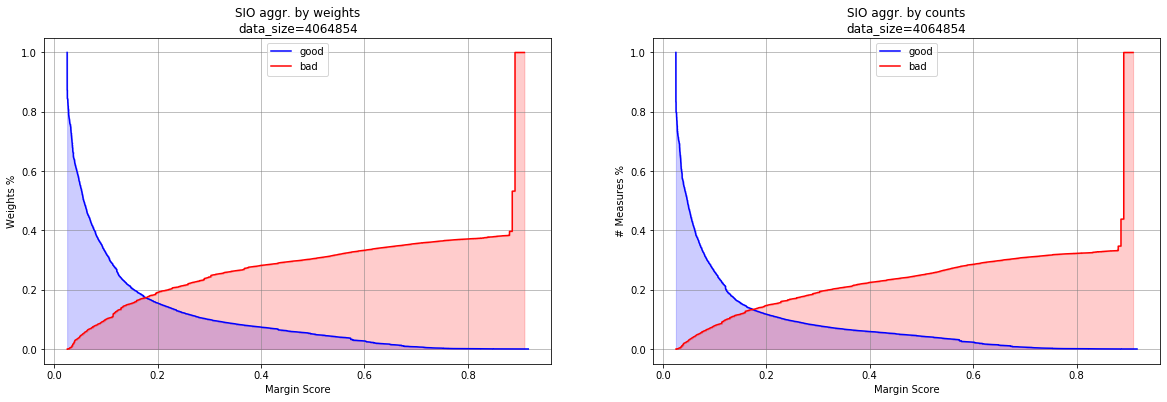

In [91]:
run_name = "second-run"
base_dir = "../runs/{}/runtime_scores".format(run_name)
_style = ['b', 'r']
sources = ["AGSO", "NGDC", "US_multi", "JAMSTEC", "NOAA_geodas", "NGA", "SIO"]


print("{0:12s}\t{1:4s}\t{2:4s}".format("Scores range", "min", "max"))
for source in sources:
    path = os.path.join(base_dir, "{}_scores.pkl".format(source))
    with open(path, 'rb') as f:
        data = pickle.load(f)
        _, _, scores, _ = data
        print("{0:12s}\t{1:.2f}\t{2:.2f}".format(source, np.min(scores), np.max(scores)))
        plot_scores(data, source)

Scores range	min 	max 
AGSO        	0.02	0.57
NGDC        	0.00	1.00
US_multi    	0.00	1.00
JAMSTEC     	0.00	1.00
NOAA_geodas 	0.09	0.32
NGA         	0.00	1.00
SIO         	0.03	0.89


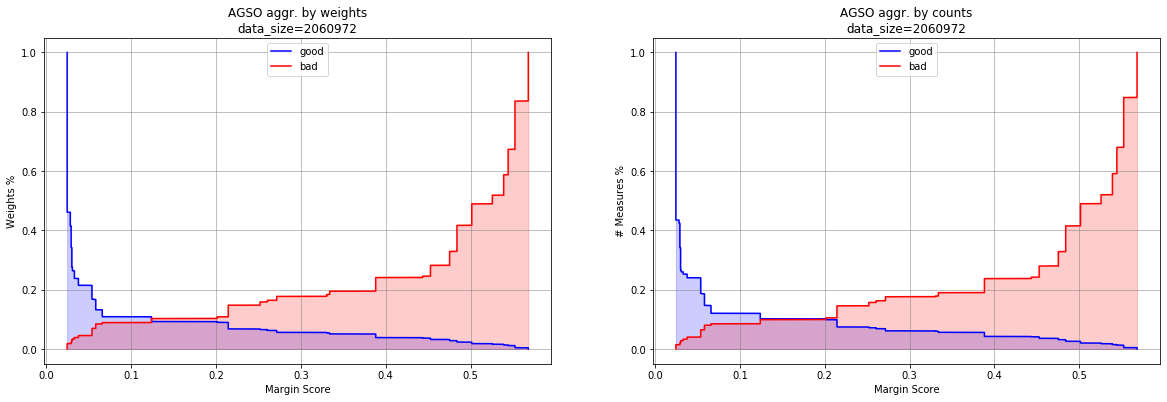

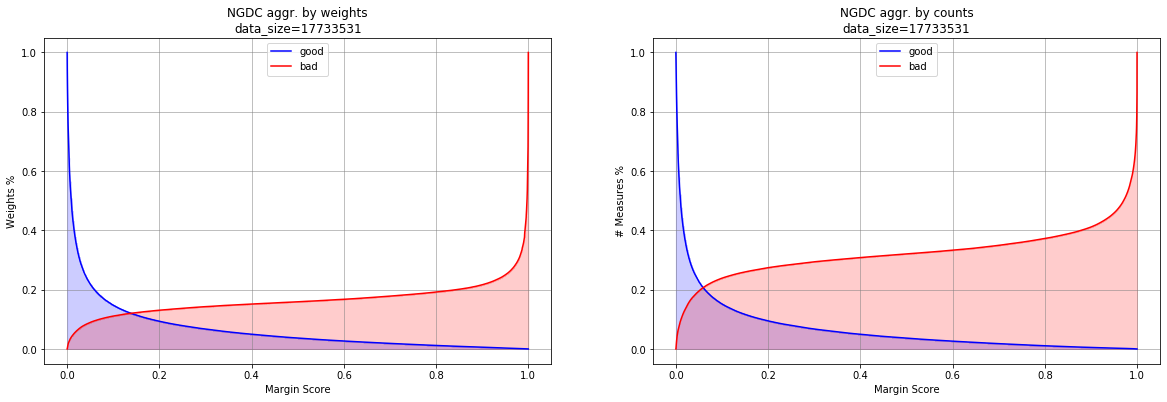

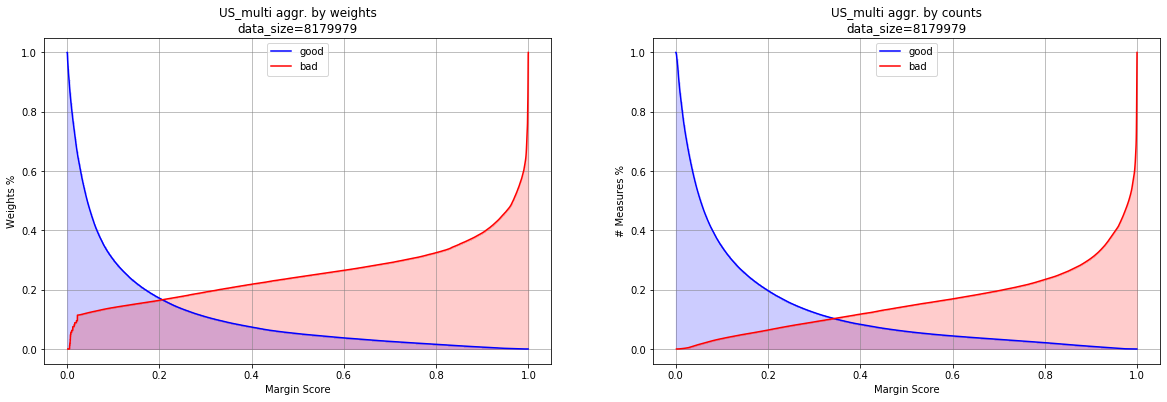

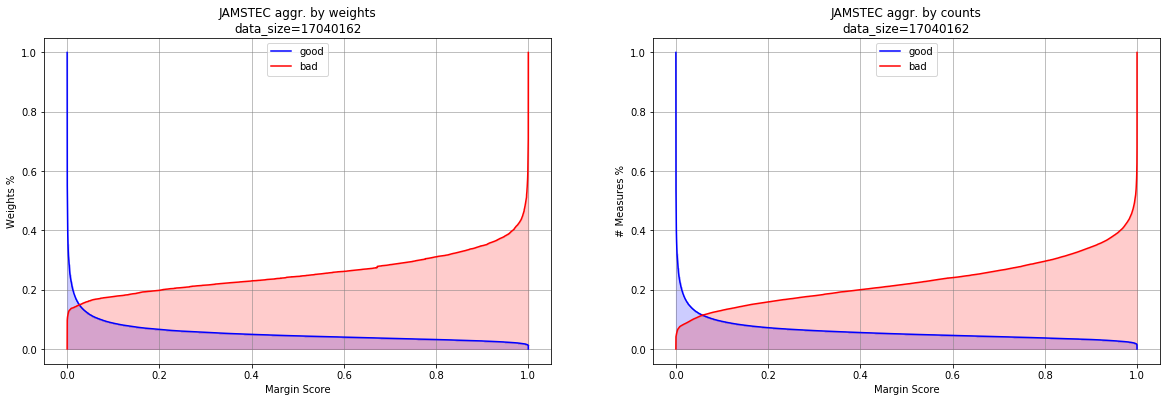

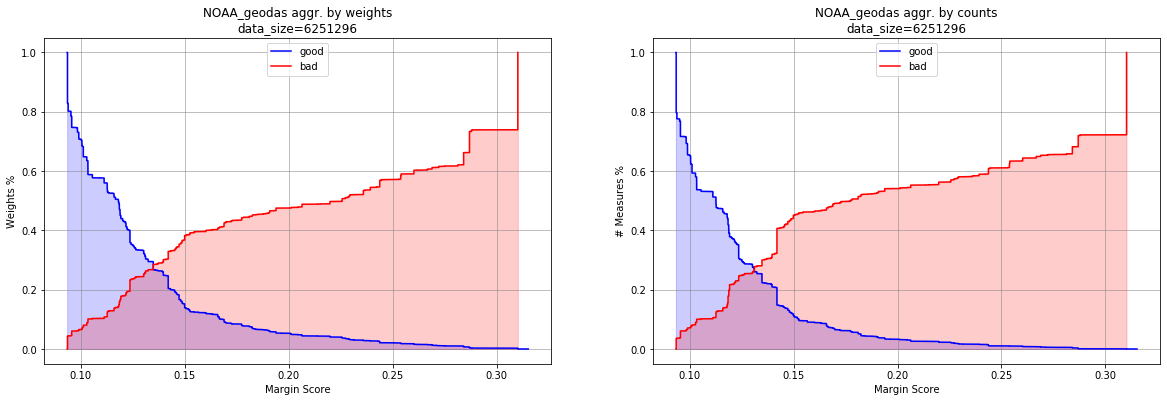

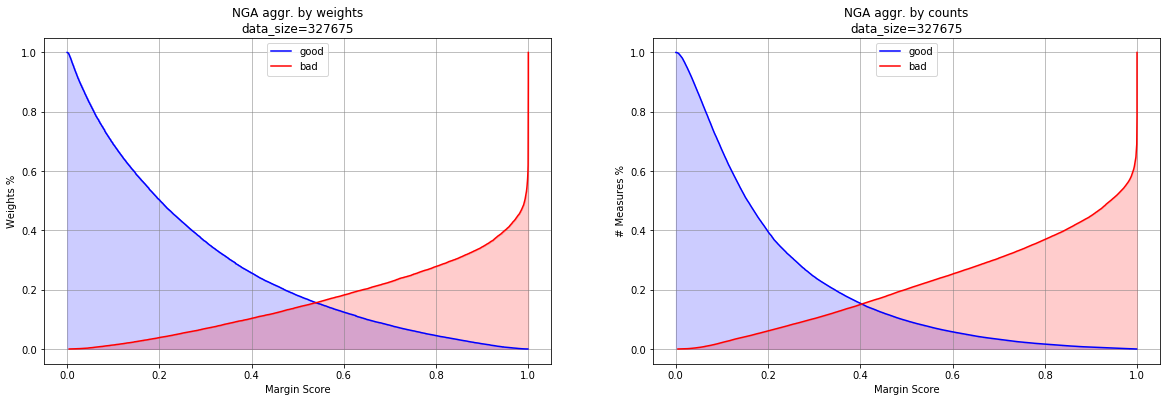

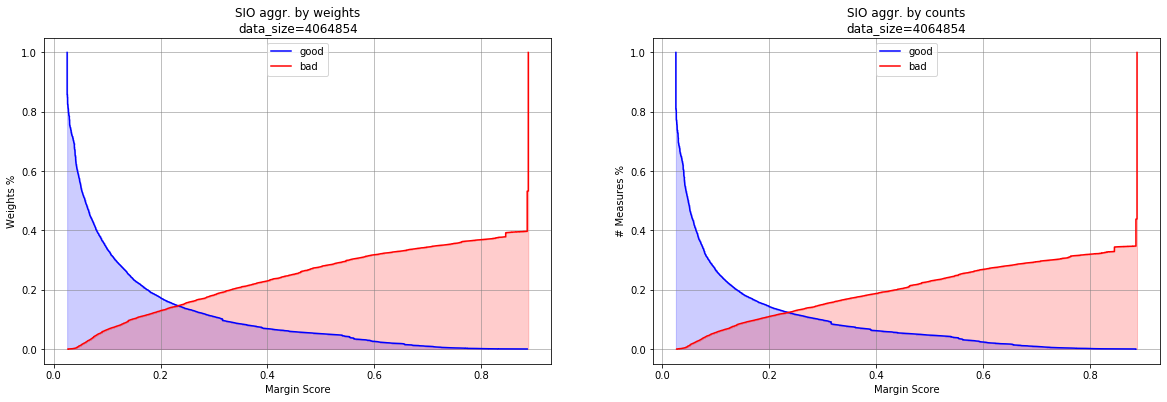

In [92]:
run_name = "third-run-no-geoloc"
base_dir = "../runs/{}/runtime_scores".format(run_name)
_style = ['b', 'r']
sources = ["AGSO", "NGDC", "US_multi", "JAMSTEC", "NOAA_geodas", "NGA", "SIO"]


print("{0:12s}\t{1:4s}\t{2:4s}".format("Scores range", "min", "max"))
for source in sources:
    path = os.path.join(base_dir, "{}_scores.pkl".format(source))
    with open(path, 'rb') as f:
        data = pickle.load(f)
        _, _, scores, _ = data
        print("{0:12s}\t{1:.2f}\t{2:.2f}".format(source, np.min(scores), np.max(scores)))
        plot_scores(data, source)